In [1]:
import radarsimpy

print("`RadarSimPy` used in this example is version: " + str(radarsimpy.__version__))

`RadarSimPy` used in this example is version: 13.0.1


# Lidar Point Cloud

The ray tracing engine within [`RadarSimPy`](https://radarsimx.com/radarsimx/radarsimpy/) can be harnessed to generate a point cloud within a user-defined scene. This point cloud primarily comprises the initial reflection points of the ray clusters, effectively resembling the point cloud obtained through Lidar technology.

## Create a Scene

A scene can be created from multiple .stl models.

In this example, 5 objects will be loaded:

- ground: a 60 m x 60 m plane used as the ground
- car_1: a Ford Raptor model
- car_2: a Lamborgini Aventador model
- car_3: a Tesla Model S model
- car_4: a Scania Truck model

Users could define the speed of the target in the target defination or specify the location of the target at each time instance.


In [2]:
import numpy as np

car3_speed = 2  # m/s
car3_yaw = 30  # deg/s

ground = {
    "model": "../models/surface_60x60.stl",
}

car_1 = {
    "model": "../models/vehicles/ford_raptor.stl",
    "location": [-8, 0, 0],
    "rotation": [0, 0, 0],
}

car_2 = {
    "model": "../models/vehicles/lamborgini_aventador.stl",
    "location": [-12, -4, 0],
    "rotation": [0, 0, 0],
    "rotation_rate": [0, 0, 0],
    "speed": [5, 0, 0],
}

car_3 = {
    "model": "../models/vehicles/tesla_model_s.stl",
    "location": [5, 4, 0],
    "rotation": [0, 0, 0],
}

car_4 = {
    "model": "../models/vehicles/scania_truck.stl",
    "location": [-15, 4, 0],
    "rotation": [0, 0, 0],
    "rotation_rate": [0, 0, 0],
    "speed": [2, 0, 0],
}

targets = [ground, car_1, car_2, car_3, car_4]

## Lidar

Now, use `dict` to define a Lidar. It has 3 properties:

- position: position of the Lidar
- phi: horzontal scanning angles in degree
- theta: vertical scanning angles in degree


In [3]:
lidar = {
    "position": [0, 0, 1.5],
    "phi": np.arange(0, 360, 1),
    "theta": np.arange(70, 110, 1),
}

To generate the point cloud, we can simply use `lidar_scene`. It will create an numpy array of the point cloud.


In [4]:
import time
from radarsimpy.simulator import sim_lidar

delta_t = 0.5
time_seq = np.arange(0, 3, delta_t)
points = []

tic = time.time()
for t in time_seq:
    points.append(sim_lidar(lidar, targets, frame_time=t))

    targets[3]["rotation"][0] += car3_yaw * delta_t
    targets[3]["location"][0] += (
        car3_speed * np.cos(targets[3]["rotation"][0] / 180 * np.pi) * delta_t
    )
    targets[3]["location"][1] += (
        car3_speed * np.sin(targets[3]["rotation"][0] / 180 * np.pi) * delta_t
    )

toc = time.time()
print("Exection time:", toc - tic, "s")

Exection time: 5.151868581771851 s


_Plot the Point Cloud_


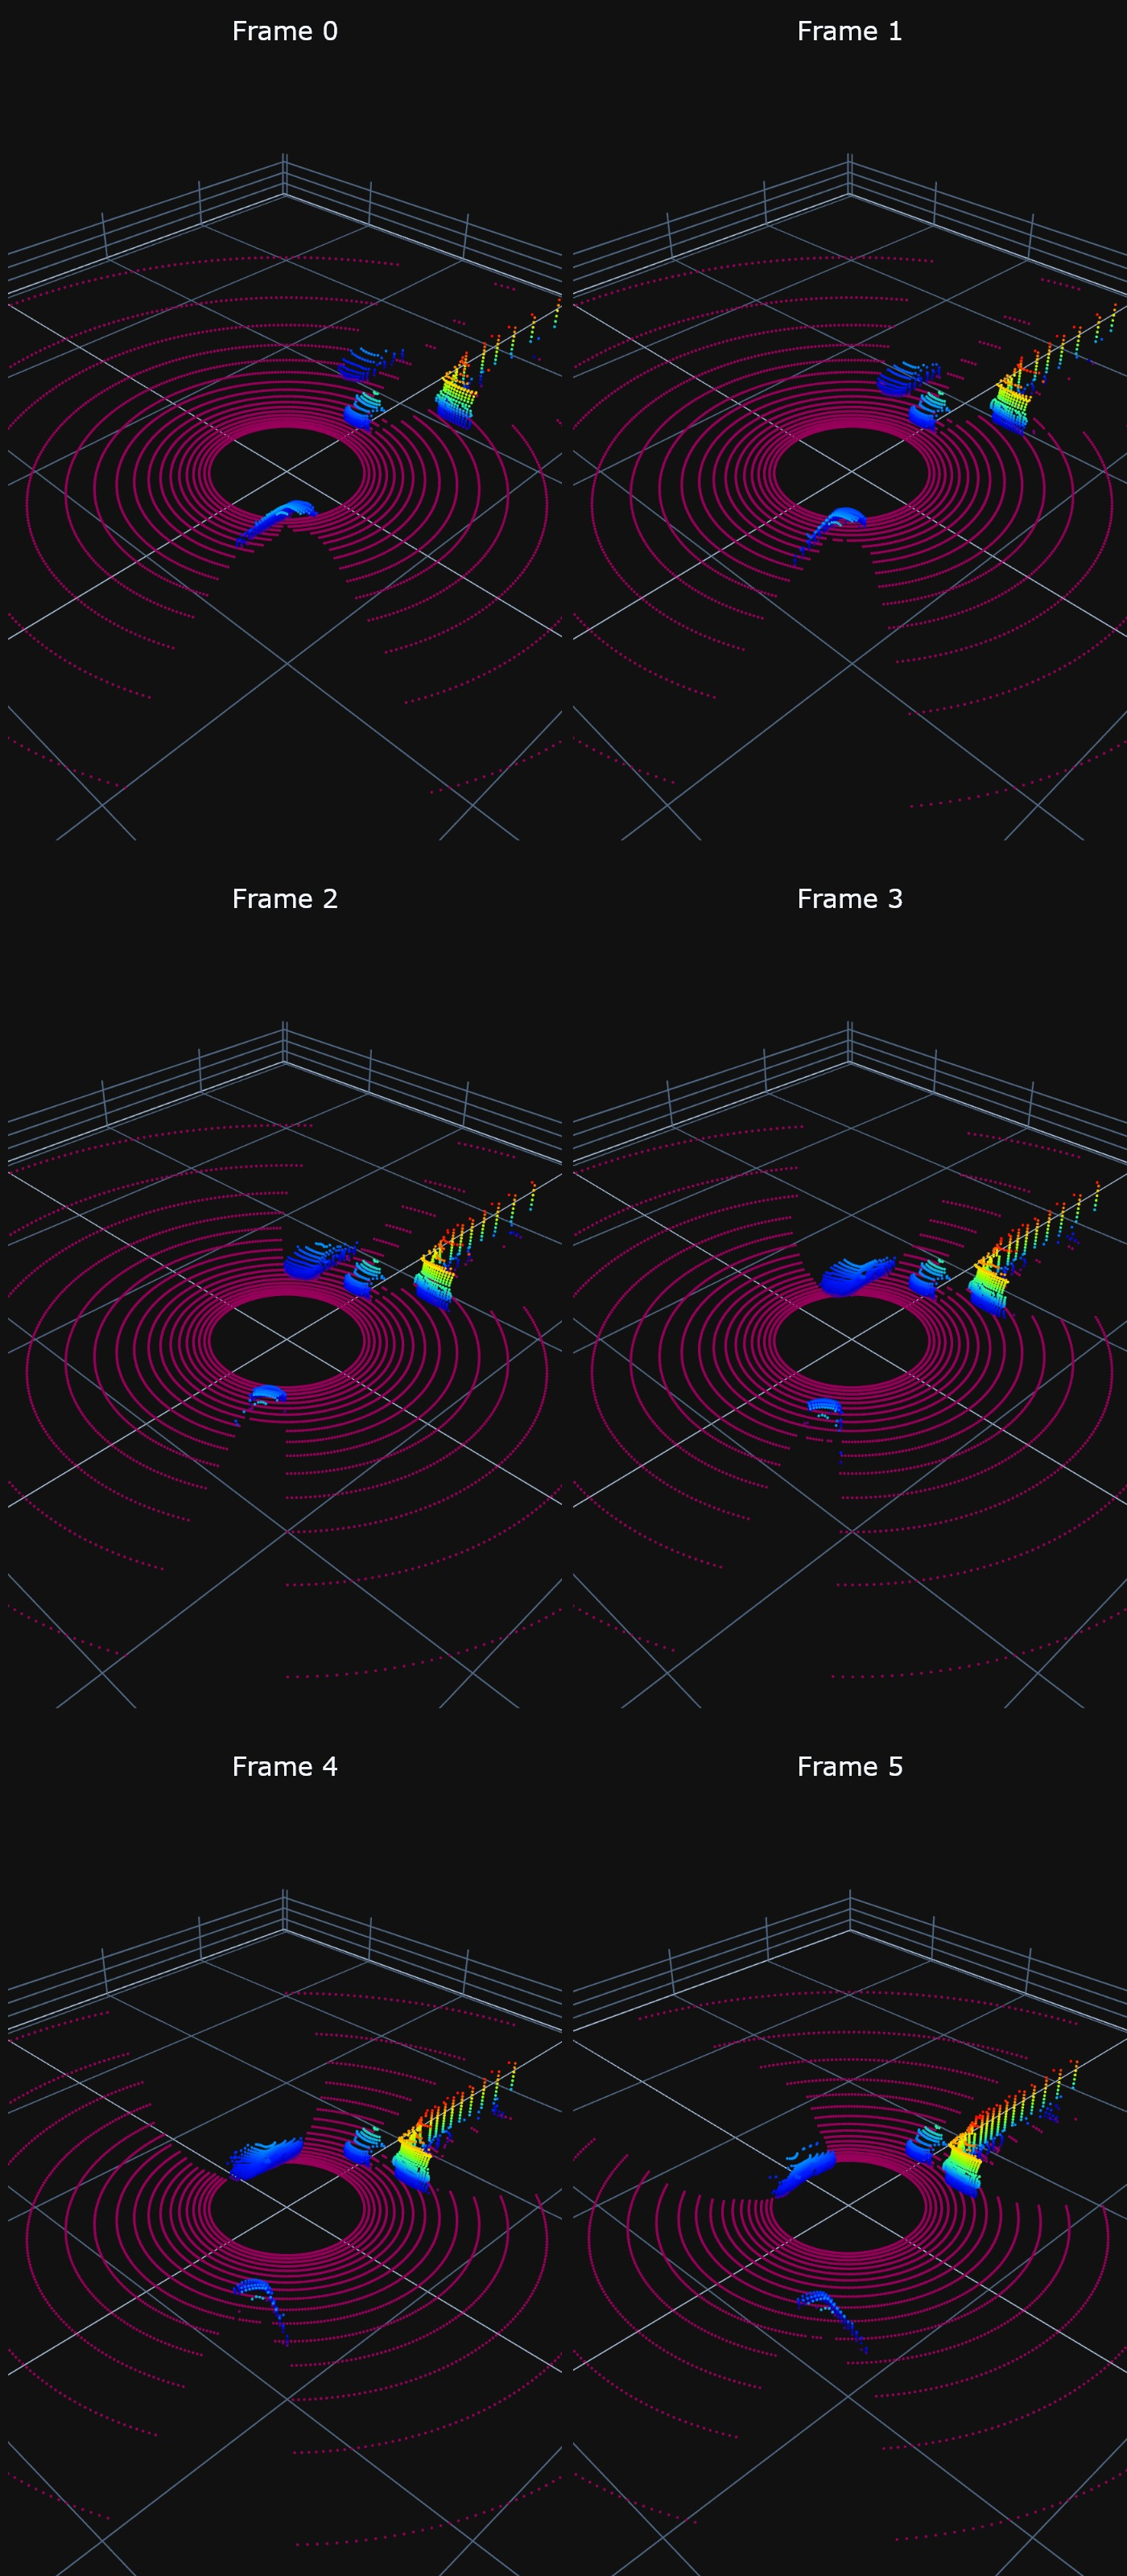

In [5]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import Image

fig = go.Figure()
fig = make_subplots(
    rows=3,
    cols=2,
    specs=[
        [{"type": "scatter3d"}, {"type": "scatter3d"}],
        [{"type": "scatter3d"}, {"type": "scatter3d"}],
        [{"type": "scatter3d"}, {"type": "scatter3d"}],
    ],
    subplot_titles=("Frame 0", "Frame 1", "Frame 2", "Frame 3", "Frame 4", "Frame 5"),
    horizontal_spacing=0.01,
    vertical_spacing=0.03,
)

for t_idx in range(0, len(time_seq)):
    fig.add_trace(
        go.Scatter3d(
            x=points[t_idx]["positions"][:, 0],
            y=points[t_idx]["positions"][:, 1],
            z=points[t_idx]["positions"][:, 2],
            mode="markers",
            marker=dict(
                size=1,
                color=points[t_idx]["positions"][:, 2],
                colorscale="Rainbow",
                opacity=1,
            ),
            showlegend=False,
        ),
        row=np.floor(t_idx / 2).astype(int) + 1,
        col=np.mod(t_idx, 2) + 1,
    )

    fig.update_scenes(
        aspectmode="data",
        row=np.floor(t_idx / 2).astype(int) + 1,
        col=np.mod(t_idx, 2) + 1,
    )

fig.update_layout(height=1600, template="plotly_dark", margin=dict(l=5, r=0, b=0, t=30))

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))